# Exploratory Data Analysis

## Requirements

In [324]:
#load necesary libraries
import pandas as pd
import os
import csv
import glob
import random

from datetime import datetime, timedelta

import matplotlib.pyplot as plt 

from matplotlib.backends.backend_pdf import PdfPages

from statsmodels.tsa.seasonal import seasonal_decompose

## For all stocks

In [290]:
csv_path = "../stock_forecasting/stock_data/Compiled/all_stocks_2006-01-01_to_2018-01-01.csv"
df = pd.read_csv(csv_path)

In [291]:
df

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM
...,...,...,...,...,...,...,...
93607,2017-12-22,71.42,71.87,71.22,71.58,10979165,AABA
93608,2017-12-26,70.94,71.39,69.63,69.86,8542802,AABA
93609,2017-12-27,69.77,70.49,69.69,70.06,6345124,AABA
93610,2017-12-28,70.12,70.32,69.51,69.82,7556877,AABA


## Classic EDA

### Show dataframe

In [292]:
df.describe()

,Open,High,Low,Close,Volume
count,93587.000000,93602.000000,93592.000000,93612.000000,9.361200e+04
mean,85.623260,86.387045,84.836664,85.641753,2.015667e+07
std,108.151723,108.956365,107.225361,108.121106,3.442108e+07
min,6.750000,7.170000,0.000000,6.660000,0.000000e+00
25%,33.950000,34.290000,33.600000,33.960000,5.040180e+06
50%,60.040000,60.630000,59.490000,60.050000,9.701142e+06
75%,94.000000,94.740000,93.250000,94.012500,2.075222e+07
max,1204.880000,1213.410000,1191.150000,1195.830000,8.432640e+08


In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93612 entries, 0 to 93611
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    93612 non-null  object 
 1   Open    93587 non-null  float64
 2   High    93602 non-null  float64
 3   Low     93592 non-null  float64
 4   Close   93612 non-null  float64
 5   Volume  93612 non-null  int64  
 6   Name    93612 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.0+ MB


In [294]:
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


In [295]:
df.tail(5)

,Date,Open,High,Low,Close,Volume,Name
93607,2017-12-22,71.42,71.87,71.22,71.58,10979165,AABA
93608,2017-12-26,70.94,71.39,69.63,69.86,8542802,AABA
93609,2017-12-27,69.77,70.49,69.69,70.06,6345124,AABA
93610,2017-12-28,70.12,70.32,69.51,69.82,7556877,AABA
93611,2017-12-29,69.79,70.13,69.43,69.85,6613070,AABA


### Missing data points

In [296]:
ex1, ex2, ex3 = random.sample(range(len(df)), 3) #show table with examples and missing values

print("Dataframe total rows: ", len(df))
df_info = pd.DataFrame(data = df.dtypes)
not_missing_values_total = df.notnull().sum()
not_missing_values_percent = round(not_missing_values_total/len(df)*100,2).astype(str)+" %"

pd.concat([df_info[0].rename("Data Type"),\
           df.T[ex1].rename("Example 1"),\
           df.T[ex2].rename("Example 2"),\
           df.T[ex3].rename("Example 3"),\
           not_missing_values_total.rename("Total Not Missing"), \
           not_missing_values_percent.rename("% of not missing values")], axis=1)

Dataframe total rows:  93612


,Data Type,Example 1,Example 2,Example 3,Total Not Missing,% of not missing values
Date,object,2014-03-20,2017-08-11,2008-01-07,93612,100.0 %
Open,float64,600.58,33.5,41.1,93587,99.97 %
High,float64,605.41,33.56,41.58,93602,99.99 %
Low,float64,598.28,33.21,40.16,93592,99.98 %
Close,float64,599.18,33.25,41.34,93612,100.0 %
Volume,int64,1684975,12928473,25650562,93612,100.0 %
Name,object,GOOGL,PFE,JPM,93612,100.0 %


In [297]:
df.isna().sum()
df.isnull().sum()

Date       0
Open      25
High      10
Low       20
Close      0
Volume     0
Name       0
dtype: int64

### Fill empty spaces

In [298]:
sliced_df = df.fillna(0)

In [299]:
sliced_df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

### Variable analysis

#### Numeric values

In [300]:
NUMERICS = ('int16', 'int32', 'int64', 'float16', 'float32', 'float64') #numeric variables
sliced_df.select_dtypes(include = NUMERICS).describe().T

,count,mean,std,min,25%,50%,75%,max
Open,93612.0,8.560039e+01,1.081463e+02,0.00,33.93,60.01,9.399250e+01,1.204880e+03
High,93612.0,8.637782e+01,1.089542e+02,0.00,34.28,60.62,9.474000e+01,1.213410e+03
Low,93612.0,8.481854e+01,1.072211e+02,0.00,33.59,59.47,9.324250e+01,1.191150e+03
Close,93612.0,8.564175e+01,1.081211e+02,6.66,33.96,60.05,9.401250e+01,1.195830e+03
Volume,93612.0,2.015667e+07,3.442108e+07,0.00,5040180.50,9701141.50,2.075222e+07,8.432640e+08


#### Categorical values

In [301]:
sliced_df.select_dtypes(include ='object').describe(include = 'O').T #categorical variables

,count,unique,top,freq
Date,93612,3020,2006-01-03,31
Name,93612,31,MMM,3020


### Data type correction

In [302]:
sliced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93612 entries, 0 to 93611
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    93612 non-null  object 
 1   Open    93612 non-null  float64
 2   High    93612 non-null  float64
 3   Low     93612 non-null  float64
 4   Close   93612 non-null  float64
 5   Volume  93612 non-null  int64  
 6   Name    93612 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.0+ MB


After analyzing the data types, I conclude that Column with name Date must be changed to a datetime related data type.

In [303]:
sliced_df["Date"] = pd.to_datetime(sliced_df["Date"])
sliced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93612 entries, 0 to 93611
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    93612 non-null  datetime64[ns]
 1   Open    93612 non-null  float64       
 2   High    93612 non-null  float64       
 3   Low     93612 non-null  float64       
 4   Close   93612 non-null  float64       
 5   Volume  93612 non-null  int64         
 6   Name    93612 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 5.0+ MB


### Value Understanding

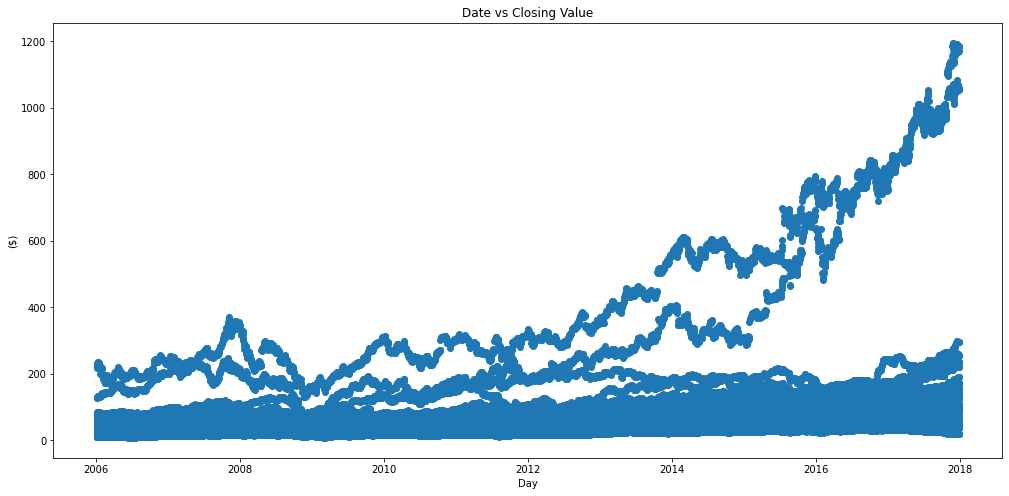

In [304]:
plt.figure(figsize=(17, 8))
plt.scatter(sliced_df['Date'],sliced_df['Close'])
plt.title('Date vs Closing Value')
plt.ylabel('($)')
plt.xlabel('Day')
plt.grid(False)
plt.show()

As you may see, the results of this graphic cant be concluded, as all stocks are plotted. In the statistical eda will be developing a bulk viz to visualize each stock by its behavior.

## Statiscal EDA

### Bulk Viz

In [305]:
def viz(sliced_df,varList):
    pdf = PdfPages('../stock_forecasting/Visualizations_PDF/BulkViz.pdf')
    for var in varList:
        graphDF = df.groupby(['Date',"Name"])[var].sum().unstack().reset_index()
        graphDF = graphDF.set_index('Date')
        for col in graphDF.columns[1::]:
            fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, sharey='row',figsize=(20, 4)) #viz formatting

            graphDF[col].plot(kind='line',ax=ax1) #line time series
            ax1.set_title('Serie')
            
            graphDF[col].plot(kind='box',ax=ax2) #boxplot
            ax2.set_title('Boxplot')
            
            graphDF[col].plot(kind='hist',ax=ax3) #hist
            ax3.set_title('Hist')

            fig.suptitle(col+' / '+var)
            pdf.savefig(fig, bbox_inches='tight')
            plt.close(fig) #optimize ram usage
    pdf.close()

In [306]:
cols = ["Open","High","Low","Close","Volume"] #numeric columns
viz(sliced_df,cols)

As I quickly analyzed the [BulkViz](../stock_forecasting/Visualizations_PDF/BulkViz.pdf) file, I found that the AMZN stock may be interesting to analize more thoroughly cause it shows several outliers in every numeric column within that stock name.

## TimeSeries Analysis

In [307]:
transformed_df = sliced_df
transformed_df.set_index(transformed_df["Date"],inplace=True)

In [308]:
transformed_df.index.dtype

dtype('<M8[ns]')

In [309]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93612 entries, 2006-01-03 to 2017-12-29
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    93612 non-null  datetime64[ns]
 1   Open    93612 non-null  float64       
 2   High    93612 non-null  float64       
 3   Low     93612 non-null  float64       
 4   Close   93612 non-null  float64       
 5   Volume  93612 non-null  int64         
 6   Name    93612 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 5.7+ MB


In [310]:
transformed_df.drop(columns=["Date"],inplace=True)

In [311]:
transformed_df.sort_index(inplace=True)

### Check dates

In [316]:
resampleDF = sliced_df.reset_index()

In [320]:
startDate = transformed_df.index.min()
endDate = transformed_df.index.max()

percTrain = .7 #subset percentage
percVal = .2
percTest = .1

difDate = (endDate - startDate).days

startTest = endDate - timedelta(days = difDate*percTest)
startVal = startTest - timedelta(days = difDate*percVal)

df_train = resampleDF[resampleDF['Date'] < startVal].set_index('Date')
df_val = resampleDF[(resampleDF['Date'] > startVal) & (resampleDF['Date'] < startTest) ].set_index('Date')
df_test = resampleDF[resampleDF['Date'] > startTest].set_index('Date')

print(f"Train dates      : {df_train.index.min()} --- {df_train.index.max()}")
print(f"Validation dates : {df_val.index.min()} --- {df_val.index.max()}")
print(f"Test dates       : {df_test.index.min()} --- {df_test.index.max()}")

Train dates      : 2006-01-03 00:00:00 --- 2014-05-23 00:00:00
Validation dates : 2014-05-27 00:00:00 --- 2016-10-17 00:00:00
Test dates       : 2016-10-18 00:00:00 --- 2017-12-29 00:00:00


### TimeSeries Viz

In [321]:
pdf = PdfPages('../stock_forecasting/Visualizations_PDF/TimeSeriesViz.pdf')

cols = ["Open","High","Low","Close","Volume"] #numeric columns

for stock in resampleDF['Name'].unique():
        for col in cols:
                fig, ax = plt.subplots(figsize=(15, 8))
                df_train[df_train['Name']==stock][col].plot(ax=ax, label='train', linewidth=1)
                df_val[df_val['Name']==stock][col].plot(ax=ax, label='validation', linewidth=1)
                df_test[df_test['Name']==stock][col].plot(ax=ax, label='test', linewidth=1)
                ax.set_title(stock + ' - ' + col)
                ax.legend();
                pdf.savefig(fig, bbox_inches='tight')
                plt.close(fig) #optimize ram usage
pdf.close()

## TimeSeries Decomposition

Brownlee, J. (2020, dic 10). How to Decompose Time Series Data into Trend and Seasonality. Machine Learning Mastery. Retrieved on june 02, 2022 from: https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

Time Series Components
A useful abstraction for selecting forecasting methods is to break a time series down into systematic and unsystematic components.

Systematic: Components of the time series that have consistency or recurrence and can be described and modeled.
Non-Systematic: Components of the time series that cannot be directly modeled.
A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

These components are defined as follows:

Level: The average value in the series.
Trend: The increasing or decreasing value in the series.
Seasonality: The repeating short-term cycle in the series.
Noise: The random variation in the series.

In [322]:
series = resampleDF
series.set_index('Date',inplace=True)

In [325]:
pdf = PdfPages('../stock_forecasting/Visualizations_PDF/TimeSeriesDecomposition.pdf')

cols = ["Open","High","Low","Close","Volume"] #numeric columns

for stock in resampleDF['Name'].unique():
    for col in cols:
        plt.tight_layout()
        plt.rcParams["figure.figsize"] = (15,8)
        result = seasonal_decompose(series[series['Name']==stock][col], model='additive',period=1)
        fig = result.plot()
        fig.suptitle(stock,x=0.1, y=.98, horizontalalignment='left', verticalalignment='top')
        pdf.savefig(fig)
        plt.close() #optimize ram usage
pdf.close()

<Figure size 432x288 with 0 Axes>